In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r"C:\Users\Faizan\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Top Cuisines
## Identifies the top three most common cuisines in the dataset.
## Calculates the percentage of restaurants serving each of these cuisines.

In [8]:
from collections import Counter
cuisine_list = df['Cuisines'].dropna().str.split(', ')
cuisine_counts = Counter([cuisine for sublist in cuisine_list for cuisine in sublist])
top_cuisines = cuisine_counts.most_common(3)
top_cuisines_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])
top_cuisines_df['Percentage'] = (top_cuisines_df['Count'] / df.shape[0]) * 100

print(top_cuisines_df)

        Cuisine  Count  Percentage
0  North Indian   3960   41.461627
1       Chinese   2735   28.635745
2     Fast Food   1986   20.793634


## Task 2: City Analysis
## Identifies the city with the highest number of restaurants.
## Calculates the average rating for restaurants in each city.
## Determines which city has the highest average rating.

City with the most restaurants: New Delhi
City with highest avg rating: Inner City


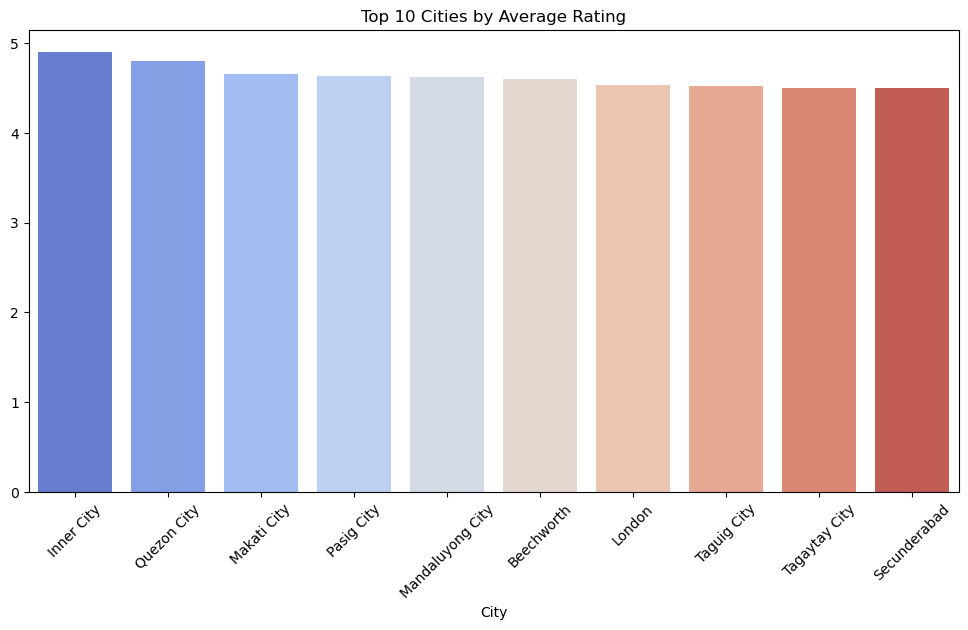

In [16]:
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()

city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

print(f"City with the most restaurants: {top_city}")
print(f"City with highest avg rating: {city_avg_rating.idxmax()}")

plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg_rating.head(10).index, y=city_avg_rating.head(10).values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average Rating")
plt.show()

## Task 3: Price Range Distribution
## Visualizes the distribution of price ranges among restaurants using a histogram or bar chart.
## Calculates the percentage of restaurants in each price category.

In [18]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


C:\Users\Faizan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


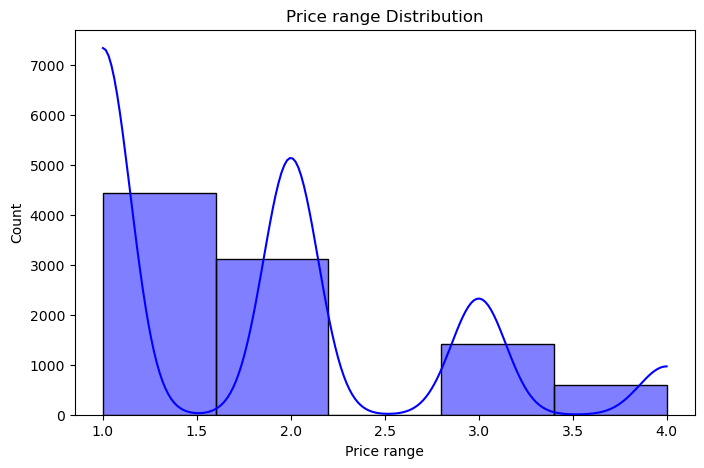

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price range'], bins=5, kde=True, color="blue")
plt.title("Price range Distribution")
plt.xlabel("Price range")
plt.ylabel("Count")
plt.show()
price_range_counts = df['Price range'].value_counts(normalize=True) * 100
print(price_range_counts)

## Task 4: Online Delivery Analysis
## Determines the percentage of restaurants that offer online delivery.
## Compares the average ratings of restaurants with and without online delivery.

Percentage of restaurants with online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64
Average Ratings:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


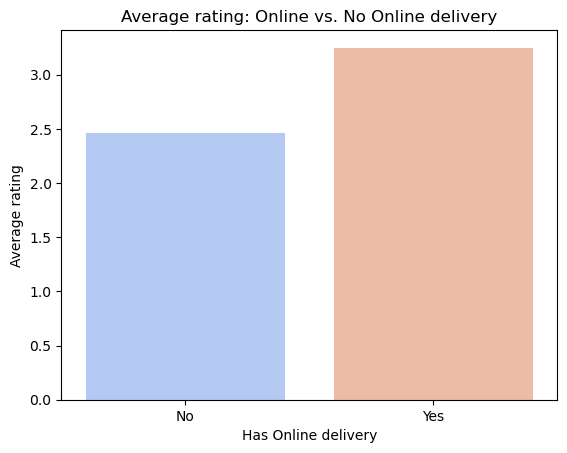

In [23]:
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
avg_rating_online = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(f"Percentage of restaurants with online delivery:\n{online_delivery_percentage}")
print(f"Average Ratings:\n{avg_rating_online}")
sns.barplot(x=avg_rating_online.index, y=avg_rating_online.values, palette="coolwarm")
plt.title("Average rating: Online vs. No Online delivery")
plt.xlabel("Has Online delivery")
plt.ylabel("Average rating")
plt.show()